# Descripción de las variables del dataset de clima

- Date: fecha de la observación meteorológica.
- Location: estación meteorológica o ciudad donde se registraron los datos.
- MinTemp: temperatura mínima registrada durante el día (°C).
- MaxTemp: temperatura máxima registrada durante el día (°C).
- Rainfall: cantidad de lluvia caída en 24 horas (mm).
- Evaporation: cantidad de agua evaporada en 24 horas (mm), medida en tanque de evaporación.
- Sunshine: número de horas de insolación efectiva durante el día.
- WindGustDir: dirección del viento más fuerte registrado en el día (puntos cardinales).
- WindGustSpeed: velocidad del viento más fuerte registrado en el día (km/h).
- WindDir9am: dirección del viento registrada a las 9:00 horas.
- WindDir3pm: dirección del viento registrada a las 15:00 horas.
- WindSpeed9am: velocidad del viento registrada a las 9:00 horas (km/h).
- WindSpeed3pm: velocidad del viento registrada a las 15:00 horas (km/h).
- Humidity9am: humedad relativa del aire a las 9:00 horas (%).
- Humidity3pm: humedad relativa del aire a las 15:00 horas (%).
- Pressure9am: presión atmosférica a nivel del mar medida a las 9:00 horas (hPa).
- Pressure3pm: presión atmosférica a nivel del mar medida a las 15:00 horas (hPa).
- Cloud9am: cobertura nubosa estimada a las 9:00 horas (octas, escala de 0 a 8).
- Cloud3pm: cobertura nubosa estimada a las 15:00 horas (octas, escala de 0 a 8).
- Temp9am: temperatura del aire a las 9:00 horas (°C).
- Temp3pm: temperatura del aire a las 15:00 horas (°C).
- RainToday: variable binaria que indica si llovió en las 24 horas previas (Yes/No).
- RainTomorrow: variable binaria que indica si llovió en las 24 horas siguientes (Yes/No). Esta es la variable objetivo a predecir en la regresión logística.

# EDA

In [176]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

from geopy.geocoders import Nominatim
import time

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler   # u otros scalers
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV,SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set_theme()

In [177]:
df = pd.read_csv("weatherAUS.csv")

In [178]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [180]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Hay 3267 valores faltantes en la variable objetivo. 

In [181]:
# Hay una gran cantidad de nulos.
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [182]:
# No hay duplicados en el dataset
df.duplicated().sum()

np.int64(0)

Se observan ciudades con nombres repetidos (SydneyAirport,MelbourneAirport).

In [183]:
# Que es PearceRAAF
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [184]:
df_copy = df.copy()

ta desbalaceao

In [185]:
df_copy.RainTomorrow.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [186]:
df_copy["Location"].unique().shape

(49,)

In [187]:
coords_dict = {
    'Albury': (-36.073773, 146.913526),
    'Badgerys Creek': (-33.883145, 150.742466),
    'Cobar': (-31.966663, 145.304505),
    'Coffs Harbour': (-30.298600, 153.109412),
    'Moree': (-29.461720, 149.840715),
    'Newcastle': (-32.919295, 151.779535),
    'Norah Head': (-33.281667, 151.567778),
    'Norfolk Island': (-29.032804, 167.948314),
    'Penrith': (-33.751195, 150.694171),
    'Richmond': (-37.807450, 144.990721),
    'Sydney': (-33.869844, 151.208285),
    'Wagga Wagga': (-35.115000, 147.367778),
    'Williamtown': (-32.815000, 151.842778),
    'Wollongong': (-34.424394, 150.893850),
    'Canberra': (-35.297591, 149.101268),
    'Tuggeranong': (-35.420977, 149.092134),
    'Mount Ginini': (-35.529744, 148.772540),
    'Ballarat': (-37.562301, 143.860565),
    'Bendigo': (-36.759018, 144.282672),
    'Sale': (-38.109446, 147.065672),
    'Melbourne': (-37.814245, 144.963173),
    'Mildura': (-34.195274, 142.150315),
    'Nhil': (-35.432540, 141.283386),
    'Portland': (-38.345623, 141.604230),
    'Watsonia': (-37.710947, 145.083781),
    'Dartmoor': (-37.895212, 141.267943),
    'Brisbane': (-27.468962, 153.023501),
    'Cairns': (-16.920666, 145.772185),
    'GoldCoast': (-28.080500, 153.430919),
    'Townsville': (-19.256939, 146.823954),
    'Adelaide': (-34.928181, 138.599931),
    'Mount Gambier': (-37.830139, 140.784263),
    'Nuriootpa': (-34.469335, 138.993901),
    'Woomera': (-31.199914, 136.825353),
    'Albany': (-35.024782, 117.883608),
    'Witchcliffe': (-34.026335, 115.100477),
    'Pearce RAAF': (-31.673960, 116.017544),
    'Perth': (-31.955897, 115.860578),
    'Salmon Gums': (-32.981517, 121.644079),
    'Walpole': (-34.977680, 116.731006),
    'Hobart': (-42.882509, 147.328123),
    'Launceston': (-41.434081, 147.137350),
    'Alice Springs': (-23.698388, 133.881289),
    'Darwin': (-12.460440, 130.841047),
    'Katherine': (-14.464616, 132.263599),
    'Uluru': (-25.345554, 131.036961)
}


In [188]:
ciudades_corregidas = {
 'BadgerysCreek': 'Badgerys Creek',
 'CoffsHarbour': 'Coffs Harbour',
 'NorahHead': 'Norah Head',
 'NorfolkIsland': 'Norfolk Island',
 'WaggaWagga': 'Wagga Wagga',
 'MountGinini': 'Mount Ginini',
 'Brisbane': 'Brisbane',
 'MountGambier': 'Mount Gambier',
 'PearceRAAF': 'Pearce RAAF',
 'SalmonGums': 'Salmon Gums',
 'AliceSprings': 'Alice Springs',
 "MelbourneAirport":"Melbourne",
 "SydneyAirport":"Sydney",
 "PerthAirport":"Perth"
}

In [189]:
df_copy['Location'] = df_copy['Location'].replace(ciudades_corregidas)

In [190]:
df_copy["Location"].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Wagga Wagga', 'Williamtown', 'Wollongong', 'Canberra',
       'Tuggeranong', 'Mount Ginini', 'Ballarat', 'Bendigo', 'Sale',
       'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor',
       'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide',
       'Mount Gambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe',
       'Pearce RAAF', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

In [191]:
df_copy.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [192]:
df_copy['Latitude'] = df_copy['Location'].map(lambda x: coords_dict[x][0])
df_copy['Longitude'] = df_copy['Location'].map(lambda x: coords_dict[x][1])
df_copy['RainToday'] = df_copy['RainToday'].map({'Yes': 1, 'No': 0})

In [193]:
df_copy.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Latitude             0
Longitude            0
dtype: int64

In [194]:
# Eliminación de NAN en columna objetivo.
df_copy = df_copy.dropna(subset=["RainTomorrow"])

In [195]:
# --- 1. Leer el shapefile ---
path_shp = "shapefiles"  # ← Cambiá por tu ruta real
gdf_clusters = gpd.read_file(path_shp)

# --- 2. Convertir tus ciudades en un GeoDataFrame ---
df_ciudades = df_copy[['Location', 'Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)

# Crear geometrías tipo Point a partir de lat/long
gdf_ciudades = gpd.GeoDataFrame(
    df_ciudades,
    geometry=gpd.points_from_xy(df_ciudades.Longitude, df_ciudades.Latitude),
    crs="EPSG:4326"  # Sistema de coordenadas WGS84 (lat/long)
)

# --- 3. Asegurar que ambos usan el mismo CRS ---
if gdf_clusters.crs != gdf_ciudades.crs:
    gdf_clusters = gdf_clusters.to_crs(gdf_ciudades.crs)

# --- 4. Hacer el "spatial join" ---
gdf_resultado = gpd.sjoin(gdf_ciudades, gdf_clusters, how="left", predicate="within")

# Si querés devolverlo a un DataFrame normal:
df_ciudades_regiones = pd.DataFrame(gdf_resultado.drop(columns="geometry"))

In [196]:
df_ciudades_regiones.head()

,Location,Latitude,Longitude,index_right,OBJECTID,Shape_Leng,Shape_Area,code,label
0,Albury,-36.073773,146.913526,2.0,4.0,45.869349,45.299310,MB,Murray Basin
1,Badgerys Creek,-33.883145,150.742466,1.0,2.0,56.117544,34.176299,EC,East Coast
2,Cobar,-31.966663,145.304505,4.0,6.0,137.457553,407.116072,R,Rangelands
3,Coffs Harbour,-30.298600,153.109412,1.0,2.0,56.117544,34.176299,EC,East Coast
4,Moree,-29.461720,149.840715,0.0,1.0,43.872364,28.309947,CS,Central Slopes


In [197]:
# Asignar manualmente la región para 'Norfolk Island'
df_ciudades_regiones.loc[df_ciudades_regiones['Location'] == 'Norfolk Island', 'label'] = 'East Coast'

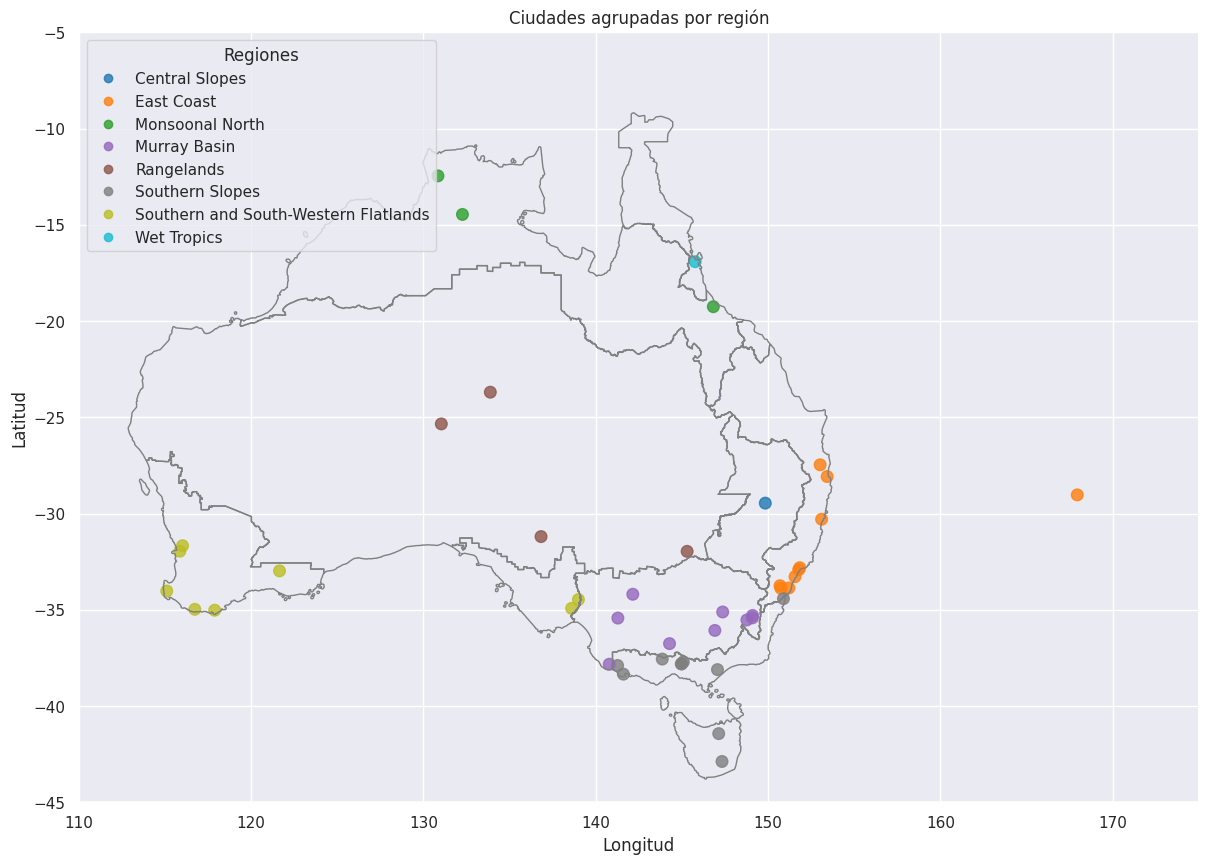

In [198]:
import matplotlib.pyplot as plt

# Asumiendo que gdf_clusters y df_ciudades_regiones ya están cargados.
# El mapeo de nombres a números de región
region_labels = sorted(df_ciudades_regiones['label'].unique())

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 10))

# Graficar los polígonos del shapefile
gdf_clusters.boundary.plot(ax=ax, color="gray", linewidth=1)

# Graficar las ciudades usando el DataFrame de pandas y matplotlib
scatter = ax.scatter(
    df_ciudades_regiones['Longitude'], 
    df_ciudades_regiones['Latitude'], 
    c=df_ciudades_regiones['label'].astype('category').cat.codes, 
    cmap="tab10", 
    s=70, 
    alpha=0.8
)

# Añadir la leyenda con los nombres de las regiones
handles, _ = scatter.legend_elements()
ax.legend(handles, region_labels, loc="upper left", title="Regiones")

# Configurar el resto del gráfico
ax.set_title("Ciudades agrupadas por región")
ax.set_xlabel("Longitud")
ax.set_xlim(110, 175) 
ax.set_ylabel("Latitud")
ax.set_ylim(-45, -5) 

plt.show()

In [199]:
#  Seleccionar y renombrar la columna 'label' a 'region'
df_regiones = df_ciudades_regiones[['Location', 'label']].rename(columns={'label': 'region'})

# 2. Unir los dataframes
df_copy = pd.merge(df_copy, df_regiones, on='Location', how='left')

# Opcional: Verificar el resultado
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [200]:
df_copy["month"] = pd.to_datetime(df_copy["Date"]).dt.month

In [201]:
def stations(df_copy):
    if df_copy['month'] == 12 or df_copy['month'] == 1 or df_copy['month'] == 2:
        return 'summer'
    elif df_copy['month'] == 3 or df_copy['month'] == 4 or df_copy['month'] == 5:
        return 'autumn'
    elif df_copy['month'] == 6 or df_copy['month'] == 7 or df_copy['month'] == 8:
        return 'winter'
    else:
        return 'spring'

In [202]:
df_copy['season'] = df_copy.apply(stations, axis=1)

In [203]:
df_copy.drop(columns=['month'], inplace=True)

In [204]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first') # sparse_output=False to get a dense array

# Fit and transform the 'season' column
season_encoded = encoder.fit_transform(df_copy[['season', 'region']])

# Create a DataFrame with the encoded columns
season_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season', 'region']), index=df_copy.index)

# Concatenate with the original DataFrame
df_copy = pd.concat([df_copy, season_df], axis=1)

# No dropeamos la columna de region para usarla mas adelante para imputar ciertas columnas
df_copy.drop(columns=['season'], inplace=True) 


In [205]:
# Mapear los nombres de las columnas para su modificación
column_mapping = {col: col.replace(' ', '_').replace('-', '_') for col in df_copy.columns}

# Renombrar las columnas del DataFrame usando el mapeo
df_copy = df_copy.rename(columns=column_mapping)

In [206]:
# Diccionario de direcciones a ángulos en grados
wind_dir_map = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

def add_all_wind_dirs_cyclic(df, colnames):
    """
    Convierte varias columnas de direcciones de viento a representaciones cíclicas
    (sin y cos). Agrega dos columnas nuevas por cada una.
    """
    for col in colnames:
        df[col + '_sin'] = df[col].map(wind_dir_map).apply(
            lambda x: np.sin(np.deg2rad(x)) if pd.notnull(x) else np.nan
        )
        df[col + '_cos'] = df[col].map(wind_dir_map).apply(
            lambda x: np.cos(np.deg2rad(x)) if pd.notnull(x) else np.nan
        )
    return df

In [207]:
cols_viento = ["WindDir3pm", "WindDir9am", "WindGustDir"]

df_copy = add_all_wind_dirs_cyclic(df_copy, cols_viento)

df_copy.drop(columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'], axis=1, inplace=True)

In [208]:
df_copy.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Latitude', 'Longitude', 'region', 'season_spring', 'season_summer',
       'season_winter', 'region_East_Coast', 'region_Monsoonal_North',
       'region_Murray_Basin', 'region_Rangelands', 'region_Southern_Slopes',
       'region_Southern_and_South_Western_Flatlands', 'region_Wet_Tropics',
       'WindDir3pm_sin', 'WindDir3pm_cos', 'WindDir9am_sin', 'WindDir9am_cos',
       'WindGustDir_sin', 'WindGustDir_cos'],
      dtype='object')

In [209]:
pd.set_option('display.max_columns', None)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 39 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Date                                         142193 non-null  object 
 1   Location                                     142193 non-null  object 
 2   MinTemp                                      141556 non-null  float64
 3   MaxTemp                                      141871 non-null  float64
 4   Rainfall                                     140787 non-null  float64
 5   Evaporation                                  81350 non-null   float64
 6   Sunshine                                     74377 non-null   float64
 7   WindGustSpeed                                132923 non-null  float64
 8   WindSpeed9am                                 140845 non-null  float64
 9   WindSpeed3pm                                 139563 non-nul

In [210]:
df_copy.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,region,season_spring,season_summer,season_winter,region_East_Coast,region_Monsoonal_North,region_Murray_Basin,region_Rangelands,region_Southern_Slopes,region_Southern_and_South_Western_Flatlands,region_Wet_Tropics,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos
132490,2016-05-18,Launceston,4.8,15.6,1.0,NaN,NaN,43.0,7.0,19.0,80.0,80.0,NaN,NaN,8.0,8.0,11.0,14.4,0.0,Yes,-41.434081,147.137350,Southern Slopes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.382683,9.238795e-01,-0.923880,3.826834e-01,-0.707107,7.071068e-01
45859,2012-01-26,Canberra,16.4,27.3,0.0,NaN,NaN,46.0,13.0,9.0,62.0,54.0,1014.1,1012.7,6.0,8.0,22.4,24.7,0.0,No,-35.297591,149.101268,Murray Basin,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.923880,-3.826834e-01,1.000000,6.123234e-17,1.000000,6.123234e-17
139393,2013-12-07,Katherine,24.9,37.7,0.0,8.0,NaN,39.0,9.0,15.0,64.0,63.0,1010.4,1007.0,0.0,4.0,31.0,36.0,0.0,No,-14.464616,132.263599,Monsoonal North,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,6.123234e-17,0.707107,7.071068e-01,0.923880,-3.826834e-01


In [211]:
# Calcula la suma de nulos y filtra para mostrar solo las columnas con un conteo > 0
df_copy.isna().sum()[df_copy.isna().sum() > 0]

MinTemp              637
MaxTemp              322
Rainfall            1406
Evaporation        60843
Sunshine           67816
WindGustSpeed       9270
WindSpeed9am        1348
WindSpeed3pm        2630
Humidity9am         1774
Humidity3pm         3610
Pressure9am        14014
Pressure3pm        13981
Cloud9am           53657
Cloud3pm           57094
Temp9am              904
Temp3pm             2726
RainToday           1406
WindDir3pm_sin      3778
WindDir3pm_cos      3778
WindDir9am_sin     10013
WindDir9am_cos     10013
WindGustDir_sin     9330
WindGustDir_cos     9330
dtype: int64

In [212]:
### prueba dropear 4 cols
df_copy.drop(columns=['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Split

In [213]:
X = df_copy.drop('RainTomorrow', axis=1)
y = df_copy['RainTomorrow']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 17969 to 121958
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Date                                         113754 non-null  object 
 1   Location                                     113754 non-null  object 
 2   MinTemp                                      113229 non-null  float64
 3   MaxTemp                                      113486 non-null  float64
 4   Rainfall                                     112572 non-null  float64
 5   WindGustSpeed                                106348 non-null  float64
 6   WindSpeed9am                                 112671 non-null  float64
 7   WindSpeed3pm                                 111645 non-null  float64
 8   Humidity9am                                  112334 non-null  float64
 9   Humidity3pm                                  110841 non-null

In [216]:
# Calculamos el porcentaje de nulos y lo multiplicamos por 100
missing_percent = X_train.isnull().mean() * 100

# Filtramos para quedarnos solo con las columnas que tienen valores nulos (> 0)
# y las ordenamos de mayor a menor
missing_percent_filtered = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Porcentaje de valores nulos por columna (solo > 0%):")
print(missing_percent_filtered)

Porcentaje de valores nulos por columna (solo > 0%):
Pressure9am        9.895916
Pressure3pm        9.867785
WindDir9am_sin     7.064367
WindDir9am_cos     7.064367
WindGustDir_sin    6.556253
WindGustDir_cos    6.556253
WindGustSpeed      6.510540
WindDir3pm_cos     2.657489
WindDir3pm_sin     2.657489
Humidity3pm        2.560789
Temp3pm            1.939272
WindSpeed3pm       1.854001
Humidity9am        1.248308
Rainfall           1.039084
RainToday          1.039084
WindSpeed9am       0.952054
Temp9am            0.647010
MinTemp            0.461522
MaxTemp            0.235596
dtype: float64


In [217]:
# plt.figure(figsize=(14,7))
# sns.heatmap(X_train[num_cols].corr(), vmax=1, vmin=-1, annot=True)
# plt.title('Correlación de las variables númericas del dataset');

In [218]:
# plt.figure(figsize=(11, 7))
# for i, col in enumerate(num_cols, 1):
#     plt.subplot(4, 4, i)
#     sns.histplot(x=X_train_scaled[col])
#     plt.title(f"Boxplot for {col}")

# plt.tight_layout()
# plt.show()

In [219]:
# plt.figure(figsize=(11, 7))
# for i, col in enumerate(num_cols, 1):
#     plt.subplot(4, 4, i)
#     sns.boxplot(x=X_train_scaled[col])
#     plt.title(f"Boxplot for {col}")

# plt.tight_layout()
# plt.show()

In [220]:
columnas_a_imputar = [
    'Pressure9am',
    'Pressure3pm',
    'WindDir9am_sin',
    'WindDir9am_cos',
    'WindGustDir_sin',
    'WindGustDir_cos',
    'WindGustSpeed',
    'WindDir3pm_cos',
    'WindDir3pm_sin',
    'Humidity3pm',
    'Temp3pm',
    'WindSpeed3pm',
    'Humidity9am',
    'Rainfall',
    'WindSpeed9am',
    'Temp9am',
    'MinTemp',
    'MaxTemp'
]

In [221]:
def imputar_columna_traintest(columna, X_train, X_test):
    """
    Imputa una columna tanto en X_train como en X_test evitando la fuga de datos y advertencias.
    Aprende los parámetros de X_train y los aplica a ambos.
    """
    # --- PRIORIDAD 1: Media regional-diaria (APRENDIDA SOLO DE X_TRAIN) ---
    media_por_grupo_train = X_train.groupby(['region', 'Date'])[columna].transform('mean')
    
    # Aplicar a X_train
    X_train[columna] = X_train[columna].fillna(media_por_grupo_train)
    
    # Aplicar a X_test
    medias_aprendidas = X_train.groupby(['region', 'Date'])[columna].mean().reset_index()
    X_test_merged = pd.merge(X_test.reset_index(), medias_aprendidas, on=['region', 'Date'], how='left', suffixes=('', '_aprendida'))
    X_test_merged.set_index('index', inplace=True)
    
    X_test[columna] = X_test[columna].fillna(X_test_merged[f'{columna}_aprendida'])

    # --- PRIORIDAD 2: ffill/bfill ---
    X_train[columna] = X_train.groupby('region')[columna].ffill().bfill()
    X_test[columna] = X_test.groupby('region')[columna].ffill().bfill()

    # --- PRIORIDAD 3: Relleno final con media global de train ---
    media_global_train = X_train[columna].mean()
    X_train[columna] = X_train[columna].fillna(media_global_train)
    X_test[columna] = X_test[columna].fillna(media_global_train) # ¡Correcto! Usar la media de train

    return X_train, X_test

# --- El nuevo bucle ---
# Ahora el bucle llama a la nueva función que maneja todo internamente
for columna in columnas_a_imputar:
    X_train, X_test = imputar_columna_traintest(columna, X_train, X_test)

print("¡Imputación completada!")

¡Imputación completada!


In [222]:
# plt.figure(figsize=(12, 8))
# for i, col in enumerate(num_cols, 1):
#     plt.subplot(4, 4, i)
#     sns.histplot(x=X_train_scaled[col])
#     plt.title(f"Boxplot for {col}")

# plt.tight_layout()
# plt.show()

In [223]:
# Calcula la suma de nulos y filtra para mostrar solo las columnas con un conteo > 0
X_train.isna().sum()[X_train.isna().sum() > 0]

RainToday    1182
dtype: int64

imputamos raintoday

In [224]:
# Definimos el umbral de lluvia
RAIN_THRESHOLD = 1.0 

# --- Imputación para X_train ---
# 1. Imputar con lógica de Rainfall
X_train.loc[(X_train['RainToday'].isnull()) & (X_train['Rainfall'] > RAIN_THRESHOLD), 'RainToday'] = 1.0
X_train.loc[(X_train['RainToday'].isnull()) & (X_train['Rainfall'] <= RAIN_THRESHOLD), 'RainToday'] = 0.0

# 2. Imputar el resto con la moda (aprendida de X_train)
rain_today_mode = X_train['RainToday'].mode()[0]
X_train['RainToday'] = X_train['RainToday'].fillna(rain_today_mode)


# --- Imputación para X_test ---
# 1. Imputar con lógica de Rainfall
X_test.loc[(X_test['RainToday'].isnull()) & (X_test['Rainfall'] > RAIN_THRESHOLD), 'RainToday'] = 1.0
X_test.loc[(X_test['RainToday'].isnull()) & (X_test['Rainfall'] <= RAIN_THRESHOLD), 'RainToday'] = 0.0

# 2. Imputar el resto con la moda APRENDIDA DE X_TRAIN para evitar data leakage
X_test['RainToday'] = X_test['RainToday'].fillna(rain_today_mode)


print("Imputación de 'RainToday' completada.")
print(f"Moda utilizada como respaldo: {rain_today_mode}")

Imputación de 'RainToday' completada.
Moda utilizada como respaldo: 0.0


In [227]:
# Lista de columnas a eliminar
cols_to_drop = ['Date', 'Location', 'Latitude', 'Longitude', 'region']

# Eliminar las columnas de ambos conjuntos de datos
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

# Verificar que las columnas se han eliminado
print("Columnas finales para el entrenamiento:")
print(X_train.columns)

print("\n¡Datos listos para el modelo! ✨")

Columnas finales para el entrenamiento:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'season_spring',
       'season_summer', 'season_winter', 'region_East_Coast',
       'region_Monsoonal_North', 'region_Murray_Basin', 'region_Rangelands',
       'region_Southern_Slopes', 'region_Southern_and_South_Western_Flatlands',
       'region_Wet_Tropics', 'WindDir3pm_sin', 'WindDir3pm_cos',
       'WindDir9am_sin', 'WindDir9am_cos', 'WindGustDir_sin',
       'WindGustDir_cos'],
      dtype='object')

¡Datos listos para el modelo! ✨


In [ ]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("¡Datos escalados y listos para el modelado! ✅")
X_train_scaled.head()

¡Datos escalados y listos para el modelado! ✅


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,season_spring,season_summer,season_winter,region_East_Coast,region_Monsoonal_North,region_Murray_Basin,region_Rangelands,region_Southern_Slopes,region_Southern_and_South_Western_Flatlands,region_Wet_Tropics,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos
17969,0.455980,0.094922,-0.278594,2.032342,0.565159,0.386381,-1.620875,0.798007,-2.246245,-1.855622,0.434755,-1.072618,-0.541183,1.764167,-0.562128,-0.582351,1.828274,-0.240688,-0.472191,-0.282802,-0.544427,-0.483198,-0.145712,-1.390526,0.069624,-1.061469,0.979951,-0.521204,-1.269824
124769,-0.388299,-1.268459,0.620735,0.756240,0.113654,1.073102,1.164226,0.217526,-1.350982,-1.094317,-0.906189,-1.202557,1.847802,1.764167,-0.562128,-0.582351,-0.546964,-0.240688,-0.472191,-0.282802,-0.544427,2.069546,-0.145712,-1.390526,0.069624,-1.380369,0.519444,-1.292619,-0.481250
39287,0.158919,0.305754,-0.278594,-0.745056,-0.902232,-0.185887,0.533637,0.556140,1.064809,0.887951,0.650539,0.327839,-0.541183,-0.566840,-0.562128,-0.582351,1.828274,-0.240688,-0.472191,-0.282802,-0.544427,-0.483198,-0.145712,1.438464,0.069624,-1.492352,-0.023761,1.341155,0.633962
127749,-0.716630,-1.184126,-0.278594,4.059092,1.806797,1.874277,-0.885188,-0.314581,-1.862561,-1.999265,-0.906189,-1.274745,-0.541183,-0.566840,-0.562128,1.717176,-0.546964,-0.240688,-0.472191,-0.282802,1.836793,-0.483198,-0.145712,-1.282854,0.619975,-1.380369,0.519444,-1.292619,0.633962
40651,0.112014,-0.144021,-0.278594,-0.219602,0.113654,0.157474,0.008146,0.024033,0.752177,0.844858,0.280624,-0.163043,-0.541183,-0.566840,-0.562128,-0.582351,1.828274,-0.240688,-0.472191,-0.282802,-0.544427,-0.483198,-0.145712,0.565273,-1.259041,-1.061469,-1.027473,0.024268,-1.380738


In [229]:
# Muestra los valores únicos y su frecuencia
print("Valores en la variable objetivo (y_train):")
print(y_train.value_counts())

# Muestra el tipo de dato técnico de la columna
print(f"\nTipo de dato de y_train: {y_train.dtype}")

Valores en la variable objetivo (y_train):
RainTomorrow
No     88218
Yes    25536
Name: count, dtype: int64

Tipo de dato de y_train: object


In [ ]:
modelo = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  
)

# Fiteamos
modelo.fit(X_train_scaled, y_train)

# predict
y_pred_balanced = modelo.predict(X_test_scaled)

# metrica accuracy
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)

print("\n¡Entrenamiento completo! 🏁")


¡Entrenamiento completo! 🏁
La precisión (Accuracy) del modelo balanceado es: 0.7840


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

          No       0.92      0.79      0.85     22098
         Yes       0.51      0.76      0.61      6341

    accuracy                           0.78     28439
   macro avg       0.71      0.77      0.73     28439
weighted avg       0.83      0.78      0.80     28439


--- Matriz de Confusión ---


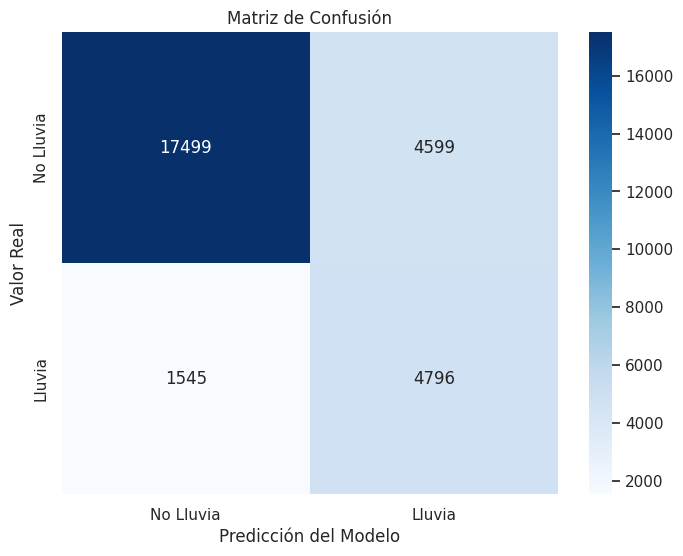

In [232]:
print("--- Reporte de Clasificación ---")
report = classification_report(y_test, y_pred_balanced)
print(report)

# 2. Generar y visualizar la Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred_balanced)

# Para una mejor visualización, usamos un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lluvia', 'Lluvia'], yticklabels=['No Lluvia', 'Lluvia'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show() # Mostramos la imagen en el notebook



es un buen detector de lluvias (alto recall), pero es poco confiable en sus alarmas (baja precision).

muchos falsos positivos

El F1-Score de 0.61 es una buena medida que resume este balance. 

El puntaje AUC del modelo es: 0.8574


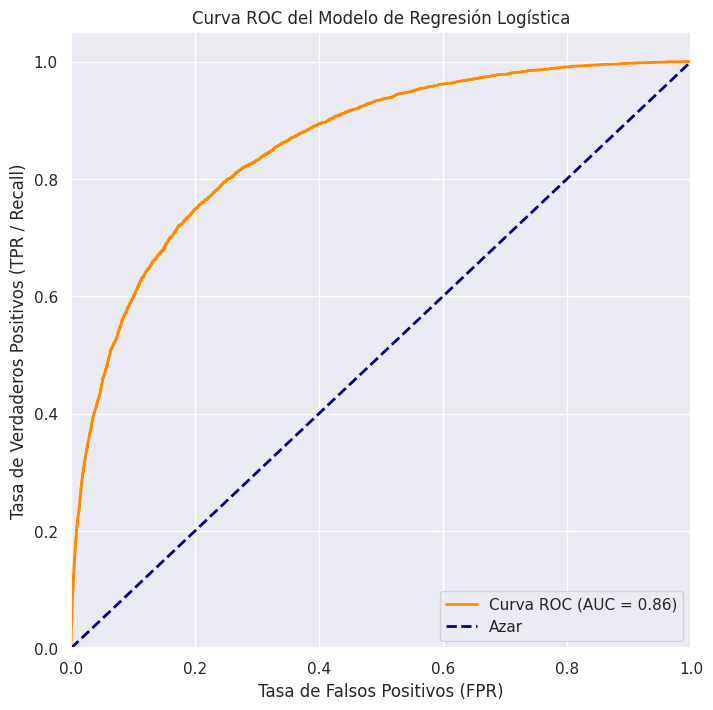

In [235]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Obtener las probabilidades de predicción para la clase positiva ('Yes')
#    predict_proba devuelve probabilidades para [clase_No, clase_Yes]
y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]

# 2. Calcular el AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"El puntaje AUC del modelo es: {auc_score:.4f}")

# 3. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes') #pos label para indicarle que 1 es yes

# 4. Graficar la Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR / Recall)')
plt.title('Curva ROC del Modelo de Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show() # Mostramos la imagen en el notebook


Un AUC de 0.86 nos indica que el modelo tiene un poder de discriminación considerable. En términos prácticos, significa que si tomas un día de lluvia al azar y un día seco al azar, hay un 86% de probabilidad de que el modelo le asigne una puntuación de riesgo de lluvia más alta al día que realmente llovió. Es una medida muy robusta de su capacidad predictiva.

In [236]:
import numpy as np

# Calculamos el estadístico J de Youden para cada umbral
j_scores = tpr - fpr

# Encontramos el índice del umbral que maximiza el J-score
ix = np.argmax(j_scores)

# Obtenemos el mejor umbral
best_threshold = thresholds[ix]

print(f"El mejor umbral encontrado es: {best_threshold:.4f}")
print(f"Con este umbral, se logra un TPR (Recall) de: {tpr[ix]:.4f}")
print(f"Y un FPR de: {fpr[ix]:.4f}")

El mejor umbral encontrado es: 0.4988
Con este umbral, se logra un TPR (Recall) de: 0.7581
Y un FPR de: 0.2092


¿Qué Nos Dice este Umbral?
El umbral óptimo encontrado es 0.4988, que es prácticamente idéntico al umbral por defecto de 0.5. Esto nos dice algo muy importante: para este modelo en particular, el balance que ofrece el umbral estándar ya está muy cerca del punto que maximiza la diferencia entre la tasa de verdaderos positivos (TPR) y la de falsos positivos (FPR).

El Recall (TPR) de 0.7581 es consistente con el 76% que vimos en el reporte de clasificación. Confirma que el modelo es bueno para detectar la mayoría de los días de lluvia.

El FPR de 0.2092 es la otra cara de la moneda. Nos da una cifra concreta para el problema de las "falsas alarmas": para alcanzar ese ~76% de Recall, el modelo tiene que "sacrificar" un 21% de los días secos, etiquetándolos incorrectamente como lluviosos. Este es el "coste" de nuestro alto Recall.